In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [6]:
from google.colab import files
cars = files.upload()

Saving cars.csv to cars.csv


# DATAFRAME

In [7]:
cars_df = pd.read_csv('cars.csv')
cars_df

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Mercedes,C-Class,2019,22000,Diesel,Automatic,First,16,1950,191,5,2900000
96,97,Toyota,Innova Crysta,2017,38000,Diesel,Manual,Second,13,2755,171,7,1400000
97,98,Ford,EcoSport,2018,26000,Petrol,Manual,Third,18,1497,121,5,750000
98,99,Hyundai,Verna,2019,24000,Petrol,Automatic,Second,17,1497,113,5,850000


# DATA PREPARATION

In [8]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [9]:
dup = cars_df.drop_duplicates()

In [10]:
import pandas as pd
cars_df.rename(columns={'x': 'length', 'y': 'width', 'z': 'depth in mm'}, inplace=True)
cars_df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


# HISTOGRAM

array([[<Axes: title={'center': 'Car_ID'}>,
        <Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Kilometers_Driven'}>],
       [<Axes: title={'center': 'Mileage'}>,
        <Axes: title={'center': 'Engine'}>,
        <Axes: title={'center': 'Power'}>],
       [<Axes: title={'center': 'Seats'}>,
        <Axes: title={'center': 'Price'}>, <Axes: >]], dtype=object)

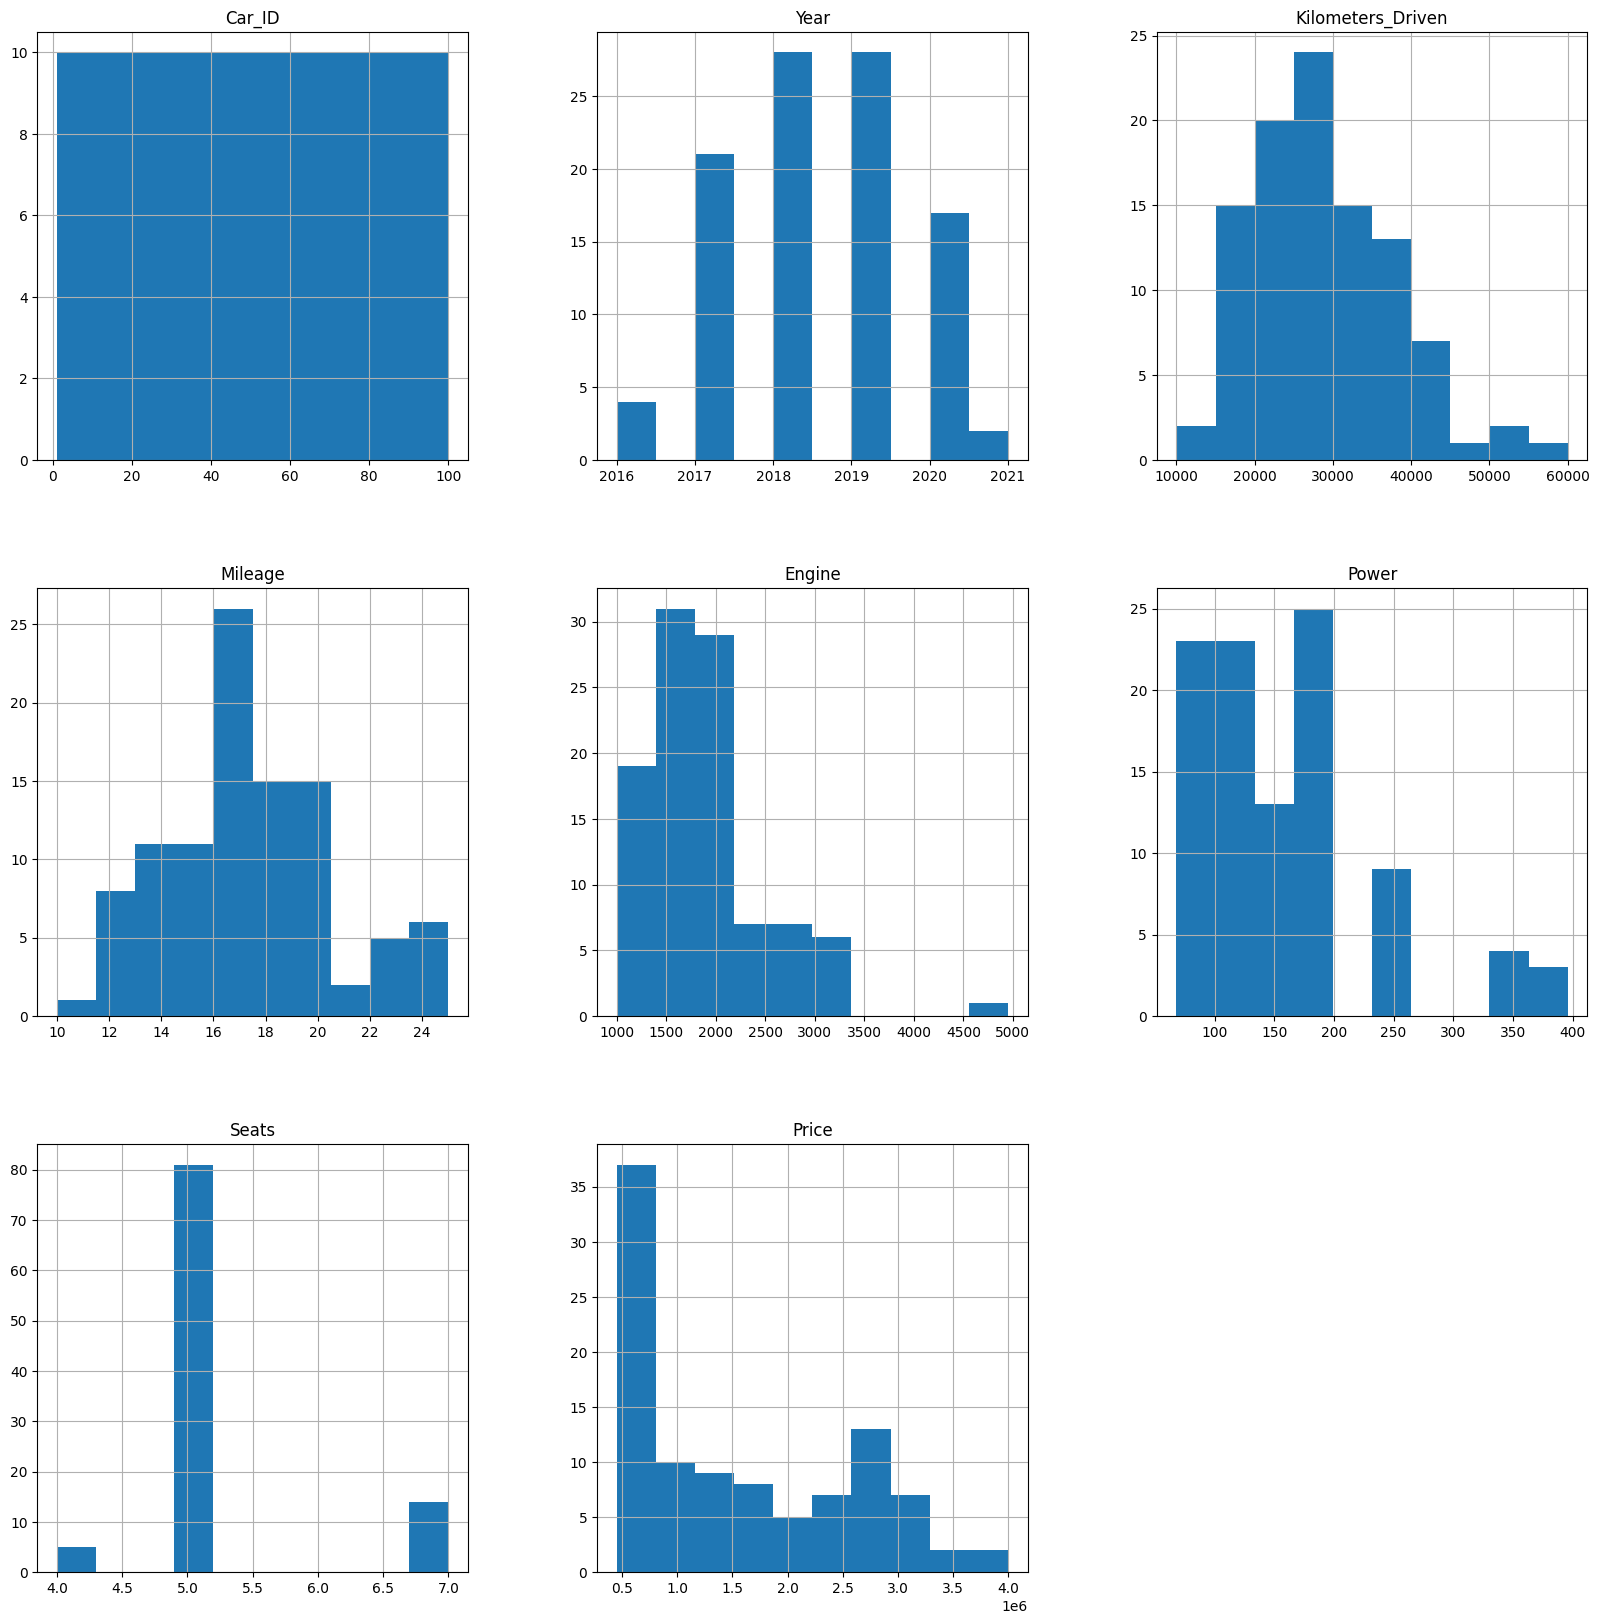

In [11]:
cars_df.hist(figsize=(20,20))

# HEAT MAP

<Axes: >

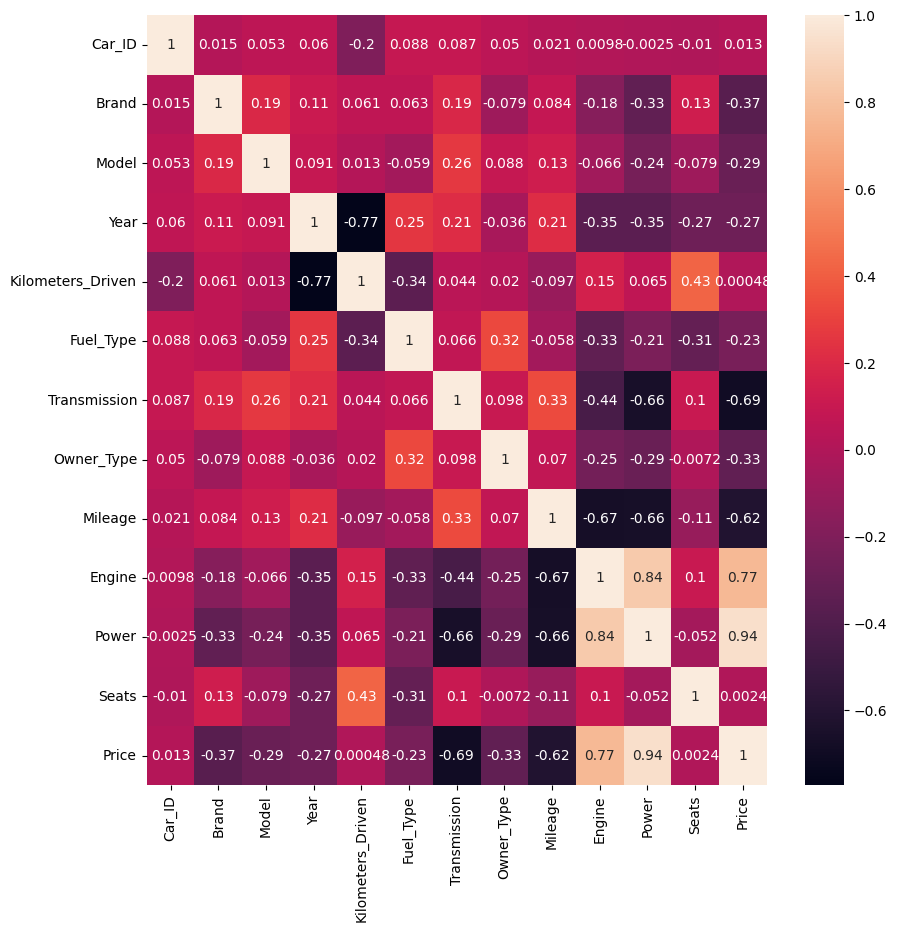

In [50]:
plt.figure(figsize=(10,10))
sns.heatmap(cars_df.corr(),annot=True)

#DATA MODELING

In [51]:
sc =  StandardScaler()
cars_df['Kilometers_Driven'] = sc.fit_transform(cars_df[['Kilometers_Driven']])
cars_df['Mileage'] = sc.fit_transform(cars_df[['Mileage']])
cars_df['Engine'] = sc.fit_transform(cars_df[['Engine']])
cars_df['Power'] = sc.fit_transform(cars_df[['Power']])
cars_df['Price'] = sc.fit_transform(cars_df[['Price']])
cars_df

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,9,15,2,2.042360,1,1,0,-0.678306,-0.460047,-0.690166,1,-0.672122
1,2,3,14,3,1.326580,1,0,1,-0.067220,-0.248531,-0.144580,1,-0.348468
2,3,2,30,1,-1.059355,1,0,0,-1.900480,1.972386,1.764969,0,0.946150
3,4,6,42,4,0.372206,0,1,2,1.766041,-0.988837,-1.508544,1,-1.103661
4,5,4,41,0,2.280954,0,0,1,0.238324,0.703290,1.128453,1,-0.564237
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,7,11,3,-0.820762,0,0,0,-0.372763,-0.037015,1.037522,1,1.377689
96,97,9,29,1,1.087986,0,1,1,-1.289393,1.443596,0.491936,2,-0.024814
97,98,2,18,2,-0.104981,1,1,2,0.238324,-0.565805,-0.417373,1,-0.780007
98,99,4,50,3,-0.582168,1,0,1,-0.067220,-0.565805,-0.599235,1,-0.564237


In [20]:
cars_df.corr()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
Car_ID,1.000000,0.015205,0.053171,0.059904,-0.203167,0.088063,0.087118,0.049568,0.021276,0.009801,-0.002504,-0.010153,0.012539
Brand,0.015205,1.000000,0.194702,0.110875,0.060948,0.063037,0.187123,-0.079183,0.084188,-0.175802,-0.326906,0.132477,-0.366677
Model,0.053171,0.194702,1.000000,0.090754,0.012566,-0.059048,0.263721,0.088050,0.131755,-0.065586,-0.236319,-0.078507,-0.288629
Year,0.059904,0.110875,0.090754,1.000000,-0.772237,0.252843,0.211993,-0.036276,0.210864,-0.350911,-0.352716,-0.271835,-0.270312
Kilometers_Driven,-0.203167,0.060948,0.012566,-0.772237,1.000000,-0.343277,0.043760,0.019548,-0.097454,0.150036,0.064878,0.425387,0.000484
Fuel_Type,0.088063,0.063037,-0.059048,0.252843,-0.343277,1.000000,0.066306,0.323325,-0.057733,-0.332769,-0.212366,-0.313500,-0.230972
Transmission,0.087118,0.187123,0.263721,0.211993,0.043760,0.066306,1.000000,0.097708,0.330430,-0.435891,-0.660058,0.100877,-0.694911
Owner_Type,0.049568,-0.079183,0.088050,-0.036276,0.019548,0.323325,0.097708,1.000000,0.070216,-0.250644,-0.292856,-0.007153,-0.327335
Mileage,0.021276,0.084188,0.131755,0.210864,-0.097454,-0.057733,0.330430,0.070216,1.000000,-0.672350,-0.661794,-0.107317,-0.617096
Engine,0.009801,-0.175802,-0.065586,-0.350911,0.150036,-0.332769,-0.435891,-0.250644,-0.672350,1.000000,0.843896,0.101295,0.768436


In [21]:
X=cars_df.drop("Price",axis=1)
X

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,1,9,15,2,2.042360,1,1,0,-0.678306,-0.460047,-0.690166,1
1,2,3,14,3,1.326580,1,0,1,-0.067220,-0.248531,-0.144580,1
2,3,2,30,1,-1.059355,1,0,0,-1.900480,1.972386,1.764969,0
3,4,6,42,4,0.372206,0,1,2,1.766041,-0.988837,-1.508544,1
4,5,4,41,0,2.280954,0,0,1,0.238324,0.703290,1.128453,1
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,7,11,3,-0.820762,0,0,0,-0.372763,-0.037015,1.037522,1
96,97,9,29,1,1.087986,0,1,1,-1.289393,1.443596,0.491936,2
97,98,2,18,2,-0.104981,1,1,2,0.238324,-0.565805,-0.417373,1
98,99,4,50,3,-0.582168,1,0,1,-0.067220,-0.565805,-0.599235,1


In [23]:
y=cars_df["Price"]
y=pd.DataFrame(y)

In [126]:
X_train,X_temp,y_train, y_temp =  train_test_split(X,y, test_size=0.3, random_state=42)
X_test,X_val,y_test,y_val =  train_test_split(X_temp,y_temp,test_size=0.5, random_state=42)

In [127]:
X_train

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
11,12,2,20,1,0.849393,0,0,1,-1.594936,1.126322,0.219144,2
47,48,1,55,2,0.133612,1,0,1,-0.983850,1.866628,1.583107,1
85,86,1,55,2,0.133612,1,0,1,-0.983850,1.866628,1.583107,1
28,29,7,17,1,0.372206,0,0,0,-0.372763,-0.037015,1.037522,1
93,94,0,5,2,0.133612,0,0,0,-0.067220,0.174501,0.855660,1
...,...,...,...,...,...,...,...,...,...,...,...,...
60,61,4,50,3,-0.582168,1,0,1,-0.067220,-0.565805,-0.599235,1
71,72,6,51,3,-0.582168,1,1,1,-0.067220,-0.777321,-0.872028,1
14,15,6,21,4,-1.297949,1,1,0,0.543867,-0.777321,-0.872028,2
92,93,10,48,1,0.610799,1,1,1,0.238324,-0.142773,-0.872028,1


In [128]:
y_train

,Price
11,0.514610
47,1.593458
85,1.593458
28,1.161919
93,1.054034
...,...
60,-0.564237
71,-0.887892
14,-0.564237
92,-0.995777


In [129]:
lr =  LinearRegression()

In [130]:
lr.fit(X_train,y_train)
y_pred_test = lr.predict(X_test)

In [131]:
y_pred = lr.predict(X_test)
y_pred

array([[ 1.21922701],
       [-0.4841629 ],
       [ 0.14650164],
       [-1.00337662],
       [ 0.01761386],
       [ 1.63605062],
       [ 0.02147888],
       [-0.8083286 ],
       [-0.79744988],
       [ 1.12317719],
       [-1.37841791],
       [ 1.06078838],
       [-1.1580997 ],
       [-0.10503779],
       [-0.04588003]])

In [132]:
mse = mean_squared_error(y_test, y_pred_test)
print(f"Mean Squared Error (MSE): {mse}")

rmse = mean_squared_error(y_test, y_pred_test, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse}")

r2 = r2_score(y_test, y_pred_test)
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 0.10030616061179638
Root Mean Squared Error (RMSE): 0.3167114784970642
R-squared (R2): 0.8928463059694159


In [133]:
y_pred_val = lr.predict(X_val)

In [134]:
mse = mean_squared_error(y_val, y_pred_val)
print(f"Mean Squared Error (MSE): {mse}")

rmse = mean_squared_error(y_val, y_pred_val, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse}")

r2 = r2_score(y_val, y_pred_val)
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 0.21878234002517472
Root Mean Squared Error (RMSE): 0.4677417450101869
R-squared (R2): 0.7350026665482574


# DATA VISUALIZATION



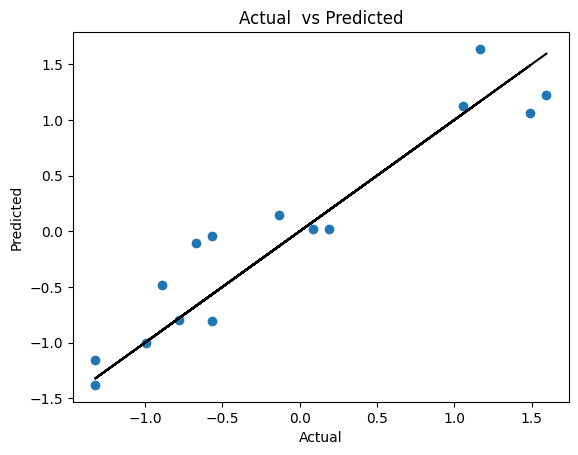

In [135]:
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test, color = 'black')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual  vs Predicted')
plt.show()

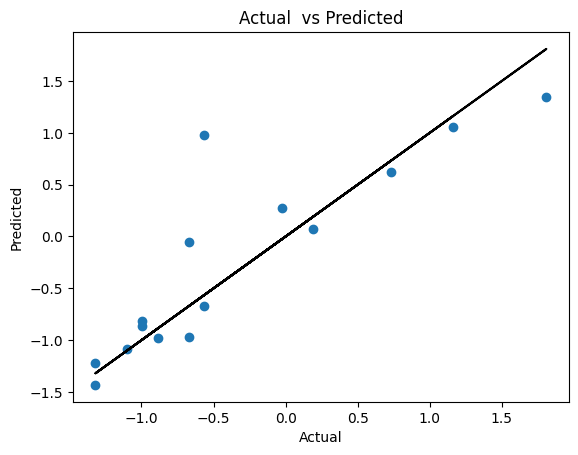

In [136]:
plt.scatter(y_val,y_pred_val)
plt.plot(y_val,y_val, color = 'black')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual  vs Predicted')
plt.show()